<a href="https://colab.research.google.com/github/antonvandike/Simulacion-II/blob/main/Metodo_de_Monte_Carlo/Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4

Las bombillas eléctricas de un fabricante A tiene una duración media a 1400 horas con
una desviación típica de 200 horas, mientras que las de otro fabricante B tiene una
duración media de 1200 horas con una desviación típica de 100 horas. Si se toman
muestras al azar de 125 bombillas de cada fabricante, ¿cual es la probabilidad de que
las bombillas de A tengan una duración media que sea al menos

(a) 160 horas,

(b) 250

horas mas que las bombillas de B?

### Soluacion por simulacion

**Paso 1.**

Tenemos dos variables:

$X_a$: Bombillas del fabricante A

$X_b$: Bombillas del fabricante B

Que representan la duracion media de las bombillas electricas de cada fabricante

**Paso 2 y 3.**

Sean $X_a$ y $X_b$ variables aleatorias continuas con distribucion normal
\begin{align*}
  X_a &\sim N(1400,200)\\
  X_b &\sim N(1200,100)
\end{align*}

a) tenemos que la expresion de que las bombillas de A tengan una duracion media  que sea al menos 160 horas mas qque las bombillas de B
\begin{equation*}
  X_a - X_b \geq 160
\end{equation*}

b) tenemos que la expresion de que las bombillas de A tengan una duracion media  que sea al menos 160 horas mas qque las bombillas de B
\begin{equation*}
  X_a - X_b \geq 250
\end{equation*}

In [ ]:
# Librerias a usar

import numpy as np
import math as mt
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as sst

Implementando el codigo de las ecuaciones objetivo

In [ ]:
def duracion(d):
  duracion_d=0

  X_a = rd.gauss(1400,200)
  X_b = rd.gauss(1200,100)

  if X_a - X_b >= d:
    duracion_d = 1

  return(duracion_d)

In [ ]:
print(duracion(160))
print(duracion(250))


1
0


**Paso 5.** Diseño del experimento

Para estimar la probabilidad del suceso, que de N bombillas de cada fabricante, necesitamos el numero n de las veces que las bombillas del fabricante A, tuvieron una duracion de 160 y 250 horas mas que las del fabricante B

In [ ]:
# prob_mas: Funcion que estima la probablidad de que de N bombillas
# las bombillas del fabricante A tengan una duracion d mayor que las del
# fabricante B
# Devuelve una lista con las probablidad del suceso de N bombillas
def prob_masd(N,d):
  bombillas= []        #Lista que guarda si las bombillas de A duraron mas que las de B
  prob_bombillas = []  #Lista que guarda la probablidad del suceso de N bombillas

  for x in range(N):
    bombillas.append(duracion(d))
    prob_bombillas.append( np.mean(bombillas) )
  return(prob_bombillas)

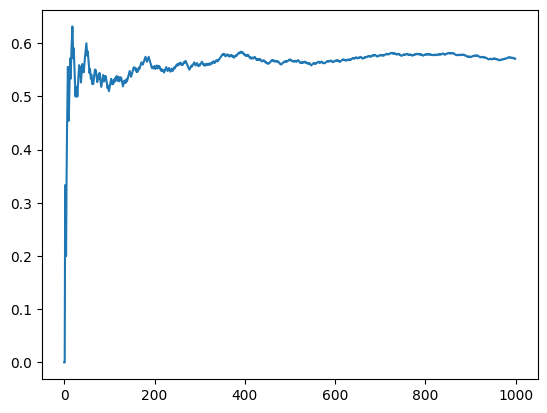

In [ ]:
# X_a - X_b >= 160

p_160 = prob_masd(1000,160)
plt.plot(p_160)
plt.show()

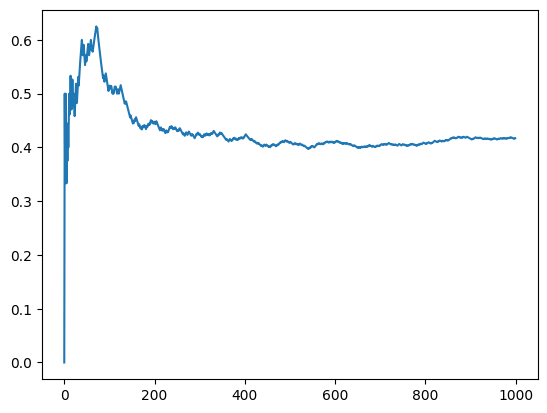

In [ ]:
# X_a - X_b >= 250

p_250 = prob_masd(1000,250)
plt.plot(p_250)
plt.show()

Se puede aprecias que para ambos incisos, con 600 iteraciones, se estabiliza la grafica

La probablidad de que las bombilas de A duren 160 horas mas que las B, tiene una media y una desviacion estandar de

In [ ]:
print('x_p =',np.mean(p_160))
print('s_p =',np.std(p_160))

x_p = 0.5626694110341279
s_p = 0.03533248642447295


La probablidad de que las bombilas de A duren 250 horas mas que las B, tiene una media y una desviacion estandar de

In [ ]:
print('x_p =',np.mean(p_250))
print('s_p =',np.std(p_250))

x_p = 0.4307629744433913
s_p = 0.04713910081204687


**Paso 6.** Repita el experimento n veces



In [ ]:
# modelo: funcion que repite el experimento n veces
# Devuelve una lista con las probabilidades de cada experimento
def modelo(n,d):
  l1 = []

  for x in range(n):
    p = prob_masd(600,d)
    l1.append(np.mean(p))

  return(l1)

In [ ]:
Y_1 = modelo(200,160)
Y_2 = modelo(200,250)

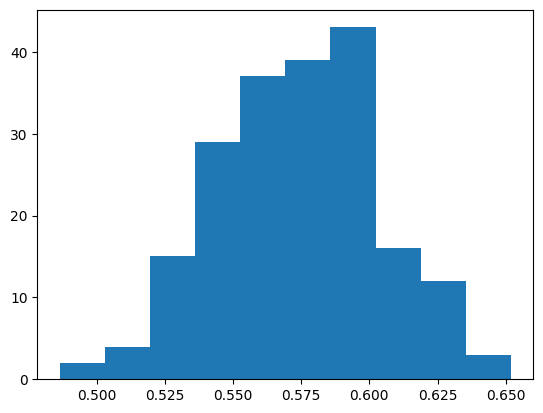

In [ ]:
plt.hist(Y_1)
plt.show()

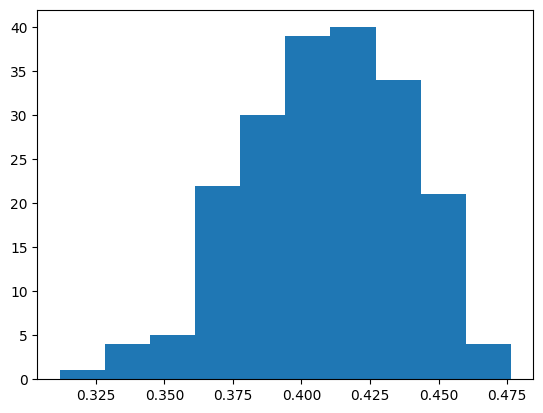

In [ ]:
plt.hist(Y_2)
plt.show()

La probabilidad estimada de que $X_1 - X_2 \geq 160$ es

In [ ]:
y1_m = np.mean(Y_1)
print(y1_m)

0.5736569546948977


con una desviacion estandar

In [ ]:
s_y1 = np.std(Y_1)
print(s_y1)

0.029008895076674885


La probabilidad estimada de que $X_1 - X_2 \geq 250$ es

In [ ]:
y2_m = np.mean(Y_2)
print(y2_m)

0.4081747295879363


con una desviacion estandar

In [ ]:
s_y2 = np.std(Y_2)
print(s_y2)

0.02862033089993353


con estos modelos, podemos estimar el numero de veces para repetir dichos modelos con la ecuacion

\begin{equation*}
  N = \left( \frac{2 \sigma z_{\frac{\alpha}{2} }}{\epsilon} \right)^2
\end{equation*}

In [ ]:
N_1 = round(mt.pow((2*s_y1*1.96)/(0.01),2))
print(N_1)

129


In [ ]:
N_2 = round(mt.pow((2*s_y2*1.96)/(0.01),2))
print(N_2)

126


entonces con 130 iteraciones para cada metodo obtenemos

In [ ]:
# Y_iN : Nuevo modelo con el numero de iteraciones optimas
print('X_1 - X_2 >= 160')

Y_1N = modelo (130,160)
y1N_m = np.mean(Y_1N)
s_y1N = np.std(Y_1N)
print('media y desviacion estandar')
print('y_m =',y1N_m)
print('s_y =',s_y1N)

X_1 - X_2 >= 160
media y desviacion estandar
y_m = 0.567102990163717
s_y = 0.028392511897711675


In [ ]:
print('X_1 - X_2 >= 250')

Y_2N = modelo (130,250)
y2N_m = np.mean(Y_2N)
s_y2N = np.std(Y_2N)
print('media y desviacion estandar')
print('y_m =',y2N_m)
print('s_y =',s_y2N)

X_1 - X_2 >= 250
media y desviacion estandar
y_m = 0.4093952101197953
s_y = 0.02675324294312652


Los nuevos histogramas son

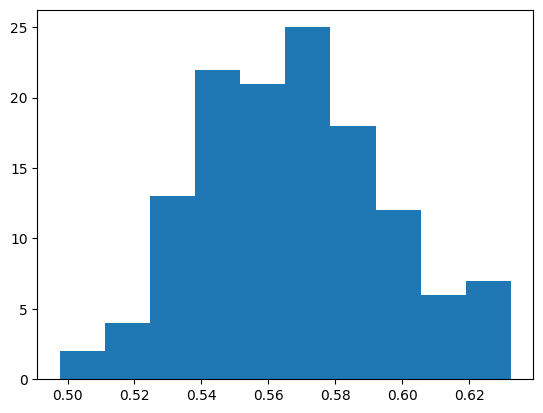

In [ ]:
plt.hist(Y_1N)
plt.show()

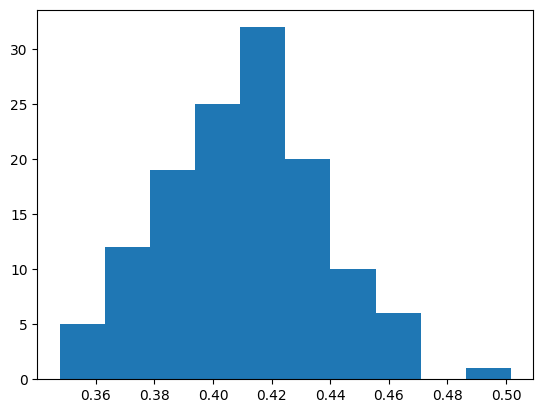

In [ ]:
plt.hist(Y_2N)
plt.show()

**Paso 7**. Hallar el intervalo de confianza para la media
\begin{equation*}
  \bar{y_1} - Z_{\frac{\alpha}{2}} \cdot \frac{s_{y_1}}{\sqrt{130}} < \mu_{y_1} < \bar{y_1} + Z_{\frac{\alpha}{2}} \cdot \frac{s_{y_1}}{\sqrt{130}}
\end{equation*}

In [ ]:
print(y1N_m - 1.96*(s_y1N/np.sqrt(130)), y1N_m + 1.96*s_y1N/np.sqrt(130))

0.562222221635078 0.5719837586923561


Entonces, la media estimada esta dentro del intervalo de confianza con una confiabilidad del 95\%

\begin{equation*}
  \bar{y_2} - Z_{\frac{\alpha}{2}} \cdot \frac{s_{y_2}}{\sqrt{130}} < \mu_{y_2} < \bar{y_2} + Z_{\frac{\alpha}{2}} \cdot \frac{s_{y_2}}{\sqrt{130}}
\end{equation*}

In [ ]:
print(y2N_m - 1.96*(s_y2N/np.sqrt(130)), y2N_m + 1.96*s_y2N/np.sqrt(130))

0.40479623745171056 0.41399418278788


Entonces, la estimada estimada esta dentro del intervalo de confianza con una confiabilidad del 95\%

Por tanto, la probabilidad de que las bombillas del fabricante A tenga una duracion media de mas de 160 horas que las bombillas del fabricante B es

In [ ]:
print('p =',y1N_m )

p = 0.567102990163717


y

Por tanto, la probabilidad de que las bombillas del fabricante A tenga una duracion media de mas de 250 horas que las bombillas del fabricante B es

In [ ]:
print('p =',y2N_m )

p = 0.4093952101197953


### Solucion analitica

Sean $X_1$ y $X_2$ variables aletarias continuas con  distribucion normal

\begin{align*}
  X_1 &\sim N(1400,200)\\
  X_2 &\sim N(1200,100)\\\\
\end{align*}

por el teorema fundamental de las distribuciones normales, tenemos que la diferencia de dos variables aleatorias normales, tiene una distribucion normal dada por

\begin{equation*}
  X_1-X_2 \sim N(\mu_1 - \mu_2, \sqrt{\sigma_1 +\sigma_2} )\\
\end{equation*}

entonces

\begin{align*}
  X_1 - X_2 &\sim N(1400 - 1200,\sqrt{200^2 + 100^2})\\
  X_1 - X_2 &\sim N(200,223.6067)
\end{align*}

a) ¿cual es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 160 horas mas que las bombillas de B?

\begin{align*}
  P(X_1 - X_2 \geq 160) &= 1 - P(X_1 - X_2 < 160)\\
                        &= 1 - P(\frac{X_1 - X_2- 200}{223.6067}) < \frac{160- 200}{223.6067})\\
                        &= 1 - P(Z<-0.1788)\\
                        &= 0.5709
\end{align*}

por tanto, la probabilidad es del 57.09\%

b) ¿cual es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 250 horas mas que las bombillas de B?

\begin{align*}
  P(X_1 - X_2 \geq 250) &= 1 - P(X_1 - X_2 < 250)\\
                        &= 1 - P(\frac{X_1 - X_2- 200}{223.6067}) < \frac{250- 200}{223.6067})\\
                        &= 1 - P(Z< 0.2236)\\
                        &= 0.4115
\end{align*}

por tanto, la probabilidad es del 41.15\%

In [ ]:
p = sst.norm.cdf((160-200)/mt.sqrt(200**2 + 100**2))
print(1-p)
p = sst.norm.cdf((250-200)/mt.sqrt(200**2 + 100**2))
print(1-p)

0.5709861715062394
0.4115316368790607
